# `qcardia-data` demo

In [1]:
from pathlib import Path

import pandas as pd
import yaml
from IPython.display import display

from qcardia_data import DataModule
from qcardia_data.setup import explore_development_data_from_config, setup_cine
from qcardia_data.utils import data_to_file, print_dict
from qcardia_data.visualization import plot_data_dict

# Setup

Data has to be reformatted before it can be used in the qcardia-data pipeline. This reformatting is already implemented for the M&Ms and M&Ms-2 challenge datasets. Finally, a data split file specifying at least the test subjects is required, which is also generated automatically in the cine data setup for M&Ms and M&Ms-2.

The setup function checks whether the reformatted version already exists, and skips it, unless instructed to overwrite any reformatted data it may find.

Example reformatting output:

```
Checking dataset 'mm1' | Reformatting dataset `mm1` into `/home/bme001/shared/qcardia/data/reformatted_data`:
Recalculated time frames for subject A2E3W4: ED: 0 -> 23, ES: 0 -> 8
Recalculated time frames for subject A8C9H8: ED: 0 -> 23, ES: 0 -> 9
Recalculated time frames for subject A8I1U6: ED: 0 -> 22, ES: 0 -> 7
Recalculated time frames for subject B1K7U1: ED: 0 -> 22, ES: 0 -> 8
Recalculated time frames for subject B4I8Z7: ED: 0 -> 23, ES: 0 -> 8
Recalculated time frames for subject C0W2Y5: ED: 0 -> 23, ES: 0 -> 7
Recalculated time frames for subject C4K8M1: ED: 0 -> 22, ES: 0 -> 6
Recalculated time frames for subject C5Q2Y5: ED: 0 -> 23, ES: 0 -> 8
Recalculated time frames for subject C8V5W8: ED: 0 -> 24, ES: 0 -> 9
Recalculated time frames for subject D0E2W0: ED: 0 -> 15, ES: 0 -> 1
Recalculated time frames for subject E3I4V1: ED: 0 -> 24, ES: 0 -> 7
Recalculated time frames for subject E9L4N2: ED: 0 -> 23, ES: 0 -> 8
Recalculated time frames for subject F3L0M1: ED: 0 -> 24, ES: 0 -> 8
Recalculated time frames for subject G0I7Z6: ED: 0 -> 23, ES: 0 -> 6
Recalculated time frames for subject G4K8P3: ED: 0 -> 24, ES: 0 -> 11
Recalculated time frames for subject G4U3U8: ED: 0 -> 24, ES: 0 -> 7
Recalculated time frames for subject G6T0Z6: ED: 0 -> 24, ES: 0 -> 7
Recalculated time frames for subject H1N7P7: ED: 0 -> 22, ES: 0 -> 6
Recalculated time frames for subject H9J6L5: ED: 0 -> 23, ES: 0 -> 9
Recalculated time frames for subject I4J8P4: ED: 0 -> 24, ES: 0 -> 7
Recalculated time frames for subject J2S5T1: ED: 0 -> 23, ES: 0 -> 7
Recalculated time frames for subject M8N3Z3: ED: 0 -> 24, ES: 0 -> 13
Recalculated time frames for subject N1S7Z2: ED: 0 -> 24, ES: 0 -> 8
Recalculated time frames for subject O1O9Y6: ED: 0 -> 24, ES: 0 -> 7
Recalculated time frames for subject Q0Q1Y4: ED: 0 -> 23, ES: 0 -> 9
100%|█████████████████████████████████████████████████████████████████████████████| 345/345 [34:10<00:00,  5.94s/it]
Finished reformatting M&Ms dataset, meta data saved at `/home/bme001/shared/qcardia/data/reformatted_data/mm1.csv`

Checking dataset 'mm2' | Reformatting dataset `mm2` into `/home/bme001/shared/qcardia/data/reformatted_data`:
100%|█████████████████████████████████████████████████████████████████████████████| 360/360 [18:36<00:00,  3.10s/it]
Finished reformatting M&Ms-2 dataset, meta data saved at `/home/bme001/shared/qcardia/data/reformatted_data/mm2.csv`

Split file(s) written to '/home/bme001/shared/qcardia/data/subject_splits/default-cine-test-split.yaml'
```

In [2]:
# setup only requires a data path
data_path = Path("/home/bme001/shared/qcardia/data")

# generate reformatted data and default test subject split
setup_cine(data_path, overwrite=False)

Checking dataset 'mm1' | csv file found, overwrite = False | Skipping mm1
Checking dataset 'mm2' | csv file found, overwrite = False | Skipping mm2
Split file(s) written to '/home/bme001/shared/qcardia/data/subject_splits/default-cine-test-split.yaml'


## Exploration
Config files are used as dictionaries to setup a qcardia-data pipeline. Example config file `data-config.yaml` specifies all relevant options for a data pipeline. Config contents like image size and pixel dimensions are based on data exploration of the development (training + validation) data set. This also requires a config file, but only for subject/data selection, selecting which datasets, subjects and timeframes to include. Example config `explore-config.yaml` contains the fields necessary for data exploration. Unneccesary field are ignored, so `data-config.yaml` will also work.

In [3]:
explore_config_path = Path("explore-config.yaml")

# get exploration dataframe and print table explanation
exploration_df = explore_development_data_from_config(
    explore_config_path, return_results=True
)

pd.options.display.float_format = "{:,.2f}".format  # limit decimal places in table
display(exploration_df)  # use IPython display to show dataframe with better formatting

splitting development data into train/valid based on seeded shuffle
dataset(s): ['mm1', 'mm2']
array dim:   spatial (0-2) and temporal (3) image array dimensions [pixel] 
pixdim:      dimensions of each pixel [mm] 
applied dim: total image dimensions after applying pixdim [mm] (= dim * pixdim) 
uniform dim: image array dimensions after median pixdim has been applied, resulting in consistent/uniform pixdims [pixel] 
             (= dim * pixdim / median_pixdim), where median pixdim=[1.25, 1.25, 10.0]


,dim 0,dim 1,dim 2,dim 3,pixdim 0,pixdim 1,pixdim 2,applied size 0,applied size 1,applied size 2,uniform dim 0,uniform dim 1,uniform dim 2
mean,291.84,289.47,11.35,26.92,1.24,1.24,9.77,347.51,340.74,110.62,278.01,272.59,11.06
median,255.00,256.00,11.00,25.00,1.25,1.25,10.00,350.00,367.93,110.00,280.00,294.34,11.00
std,73.72,101.17,1.81,2.72,0.24,0.24,0.92,32.59,64.36,18.34,26.07,51.49,1.83
q: 0.00,185.00,192.00,5.00,18.00,0.61,0.61,5.00,183.20,197.44,40.00,146.56,157.95,4.00
q: 0.01,239.00,195.00,7.00,24.00,0.68,0.68,8.00,258.98,210.23,60.00,207.19,168.19,6.00
q: 0.05,239.00,195.00,9.00,25.00,0.78,0.78,8.00,278.91,228.67,80.00,223.12,182.93,8.00
q: 0.25,252.00,207.00,10.00,25.00,1.18,1.18,9.60,338.58,276.25,100.00,270.87,221.00,10.00
q: 0.50,255.00,256.00,11.00,25.00,1.25,1.25,10.00,350.00,367.74,110.00,280.00,294.19,11.00
q: 0.75,296.00,320.00,12.00,30.00,1.44,1.44,10.00,374.07,380.01,120.00,299.26,304.01,12.00
q: 0.95,442.00,511.00,14.00,30.00,1.48,1.48,10.00,386.02,421.92,140.00,308.82,337.53,14.00


## Dataloaders
Data module setup is required to cache a version of the dataset optimzied for performance. Data is cached in `.pt` files containing all relevant data and meta data, in the target dimensionality (e.g. 2D). This only has to be done once, and lowers data loading and processing computational requirements.

Example caching output:

```
splitting development data into train/valid based on seeded shuffle
Caching to `/home/bme001/shared/qcardia/data/cached_data/dev2D-mm1_285-mm2_85-sa_cine=sa_cine_gt-b5296fe704398a111570e2fafa44ae9a`:
100%|██████████████████████████████████████████████████████████████████████████████████████████████| 370/370 [08:49<00:00,  1.43s/it]
dataset path: '/home/bme001/shared/qcardia/data/cached_data/dev2D-mm1_285-mm2_85-sa_cine=sa_cine_gt-b5296fe704398a111570e2fafa44ae9a'
train: found 6738 files from 296 subjects
valid: found 1664 files from 74 subjects
```

In [4]:
# get config dict from file
data_config_path = Path("data-config.yaml")
config = yaml.load(data_config_path.open(), Loader=yaml.FullLoader)

# setup data module with config
data = DataModule(config)
data.setup()  # includes data caching if necessary

# get dataloaders for training and validation
train_dataloader = data.train_dataloader()
valid_dataloader = data.valid_dataloader()

splitting development data into train/valid based on seeded shuffle
dataset path: '/home/bme001/shared/qcardia/data/cached_data/dev2D-mm1_285-mm2_85-sa_cine=sa_cine_gt-b5296fe704398a111570e2fafa44ae9a'
train: found 6738 files from 296 subjects
valid: found 1664 files from 74 subjects


### Dataloaders: looping and data dictionaries
Loop over dataloader to get a Python dictionary for each batch. An example training batch is printed below. For large tensors, only their shape and some statistics are printed.

In [5]:
for train_batch in train_dataloader:
    print_dict(train_batch)
    break

for valid_batch in valid_dataloader:
    break

dict: meta_dict
  source:          ['/home/bme001/shared/qcardia/data/reformatted_data/mm1/A4B9O6', '/home/bme001/shared/qcardia/data/reformatted_data/mm1/C4S8W9', '/home/bme001/shared/qcardia/data/reformatted_data/mm1/L8M2U8']                                                                <class 'list'>
  dataset:         ['mm1', 'mm1', 'mm1']                                                                                                                                                                                                                                           <class 'list'>
  subject_id:      ['A4B9O6', 'C4S8W9', 'L8M2U8']                                                                                                                                                                                                                                  <class 'list'>
  total_nr_frames: tensor([34, 25, 34])                                                                           

### Dataloaders: image and label visualization
The images and labels of the training and validation batches are visualized below. The training batch shows shuffling and augmentation, while the validation batch shows neither.

mm1-A4B9O6-05-00


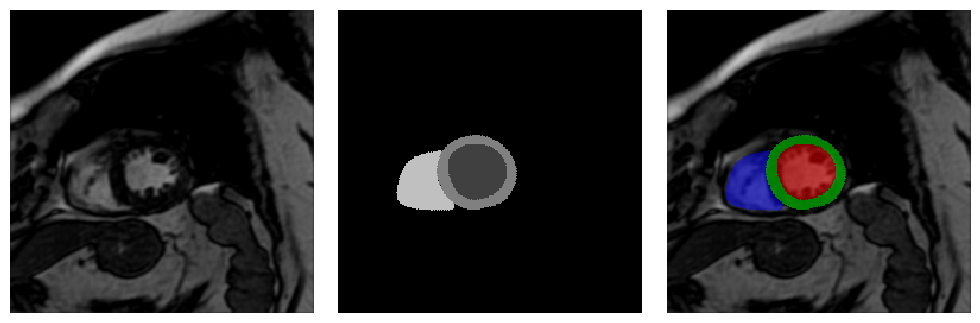

mm1-C4S8W9-11-00


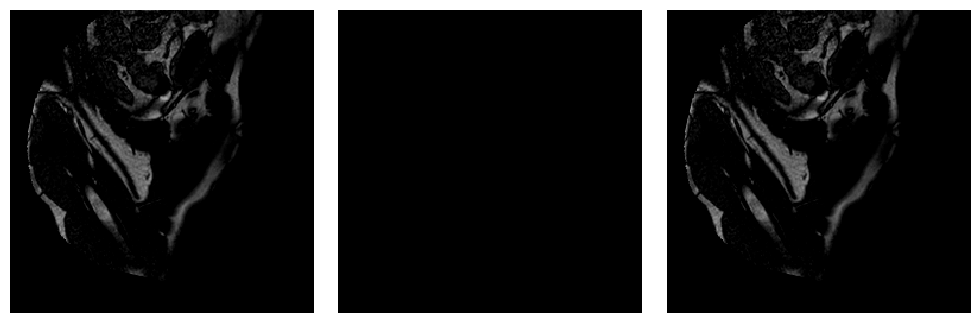

mm1-L8M2U8-08-11


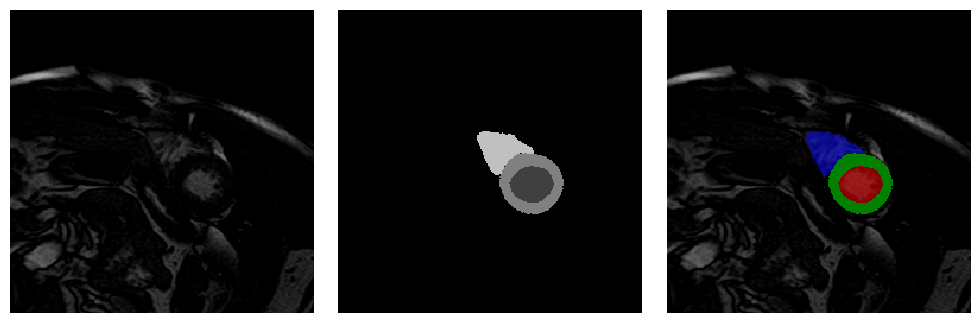

In [6]:
image_key, label_key = config["dataset"]["key_pairs"][0]
visualization_settings = {
    "overlay_alpha": 0.5,
    "histogram_equalization": False,
    "figwidth": 10,
    "figlimit": 3,
}
plot_data_dict(train_batch, image_key, label_key, **visualization_settings)

mm1-A2C0I1-00-00


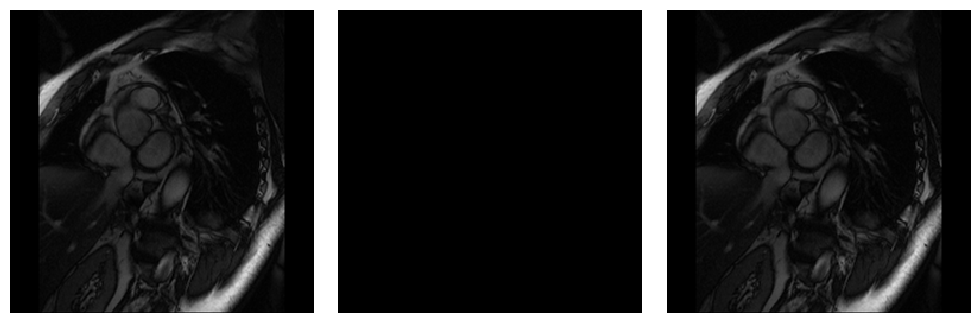

mm1-A2C0I1-00-07


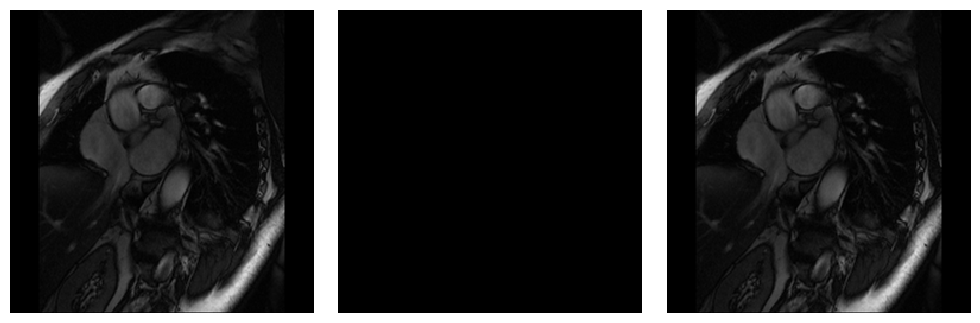

mm1-A2C0I1-01-00


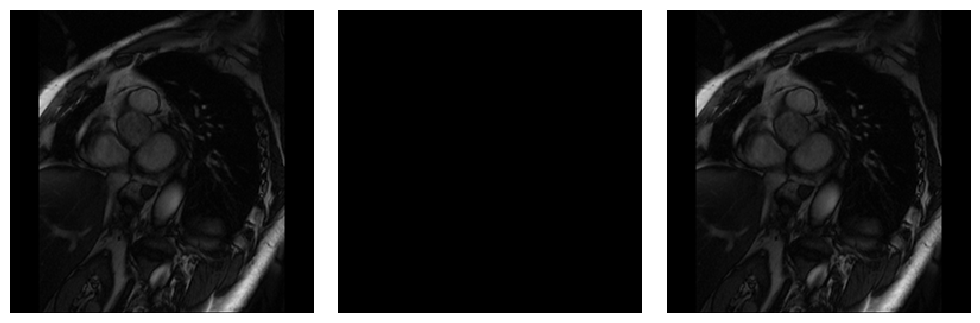

In [7]:
plot_data_dict(valid_batch, image_key, label_key, **visualization_settings)

## Data split files
The full data split dictionary can be accessed from an initialized DataModule with `DataModule.data_split`. This can be saved as a separate file for reproducibility, and the file can also be used directly in a config file. The data split file can be edited in a text editor to e.g. remove certain subjects. The qcardia-data pipeline automatically searches for data split files in the `subject_splits` subfolder in the provided subfolder.

In [8]:
# save data split file for viewing
data_to_file(data.data_split, "demo-cine-split.yaml")

# save data split file to `subject_splits` directory, where it can be recognized by file
# name by the qcardia-data pipeline (so "demo-cine-split.yaml" can be used in config).
subject_split_path = Path(config["paths"]["data"]) / "subject_splits"
data_to_file(data.data_split, subject_split_path / "demo-cine-split.yaml")